In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


In [2]:
import pandas as pd 
def load_train_data():
    data = pd.read_csv('Acoustic_train.csv')
    return data

def load_test_data():
    data = pd.read_csv('Acoustic_test_no_class.csv')
    return data

train_data = load_train_data()
test_data = load_test_data()

In [3]:
# Load and preprocess data
X_train = train_data.drop(columns=["Index", "Class"])
y_train = train_data["Class"]


In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [5]:
# Split into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)


In [6]:
# Define Base Models
model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = SVC(probability=True, kernel='rbf', random_state=42)
model3 = RandomForestClassifier(n_estimators=100, random_state=42)
model4 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model5 = KNeighborsClassifier(n_neighbors=5)

# Combine Base Models in Soft Voting Classifier
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', model1),
        ('svc', model2),
        ('rf', model3),
        ('gb', model4),
        ('knn', model5)
    ],
    voting='soft'
)


In [7]:
# Train the Ensemble Model
ensemble_model.fit(X_train_split, y_train_split)

# Make predictions
y_val_pred = ensemble_model.predict(X_val)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy with Soft Voting Ensemble:", accuracy)


Validation Accuracy with Soft Voting Ensemble: 0.8166666666666667


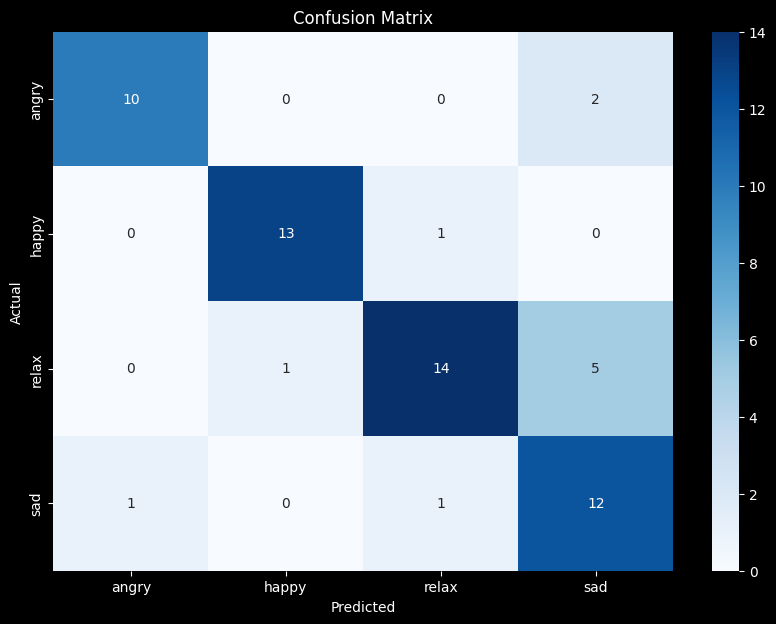

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=ensemble_model.classes_, yticklabels=ensemble_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
# Preprocess the test data
X_test = test_data.drop(columns=["Index"])
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test data
y_test_pred = ensemble_model.predict(X_test_scaled)

# Print the predicted class labels
print("Predicted Class Labels for Test Data:", y_test_pred)

Predicted Class Labels for Test Data: ['sad' 'sad' 'relax' 'relax' 'relax' 'relax' 'sad' 'sad' 'sad' 'happy'
 'sad' 'angry' 'sad' 'relax' 'happy' 'relax' 'angry' 'angry' 'sad' 'angry'
 'relax' 'angry' 'angry' 'sad' 'sad' 'angry' 'happy' 'relax' 'angry'
 'happy' 'angry' 'happy' 'sad' 'relax' 'sad' 'happy' 'happy' 'angry'
 'happy' 'happy' 'angry' 'relax' 'sad' 'relax' 'sad' 'angry' 'happy'
 'happy' 'relax' 'happy' 'relax' 'angry' 'happy' 'relax' 'angry' 'relax'
 'sad' 'happy' 'angry' 'happy' 'happy' 'sad' 'happy' 'relax' 'happy' 'sad'
 'happy' 'sad' 'happy' 'relax' 'angry' 'happy' 'sad' 'sad' 'angry' 'sad'
 'happy' 'angry' 'happy' 'relax' 'relax' 'sad' 'relax' 'relax' 'relax'
 'relax' 'relax' 'angry' 'happy' 'relax' 'sad' 'angry' 'happy' 'sad'
 'happy' 'angry' 'angry' 'happy' 'happy' 'relax']


In [9]:
# Add the predicted class labels to the test data
test_data['Predicted_Class'] = y_test_pred

# Save the test data with the predicted class labels to a CSV file
test_data.to_csv('Acoustic_test_with_predictions.csv', index=False)